In [1]:
import seaborn as sns

In [2]:
#Only useful for jupyter notebook
%matplotlib inline

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


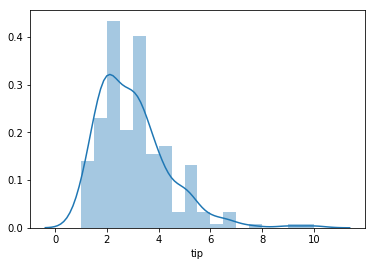

In [5]:
sns.distplot(tips['tip'])

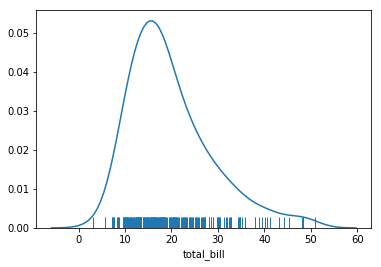

In [6]:
sns.distplot(tips['total_bill'], kde=True, hist=False, rug=True, bins=40) #can also use kde=False
#rug shows if that value is present of not (more lines there means more data there)

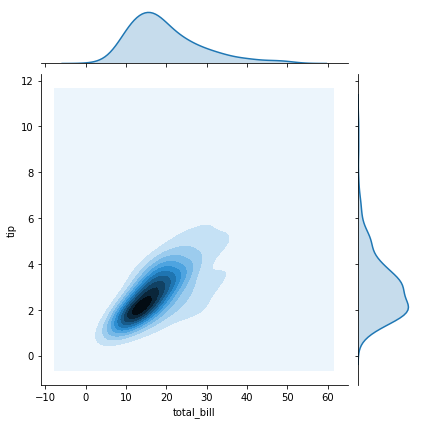

In [7]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='kde')
#Default kind='scatter', can also use 'hex'

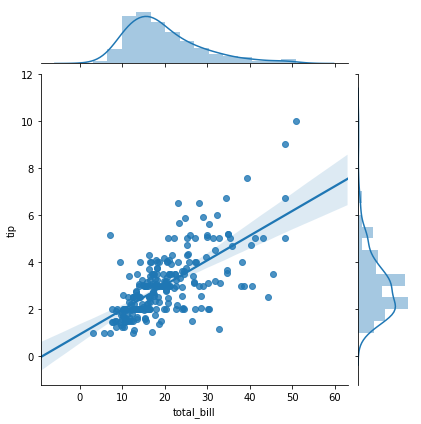

In [8]:
#Regression model
sns.jointplot(x='total_bill',y='tip',data=tips, kind='reg')

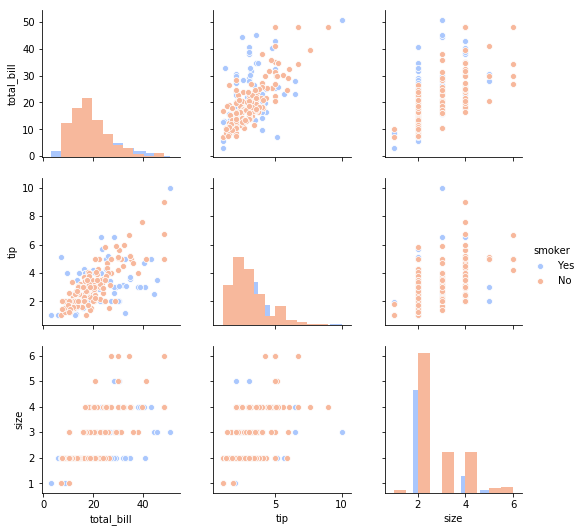

In [9]:
# Creates a pair plot of every pair of the datasets
sns.pairplot(tips, hue='smoker', diag_kind='hist', palette='coolwarm')

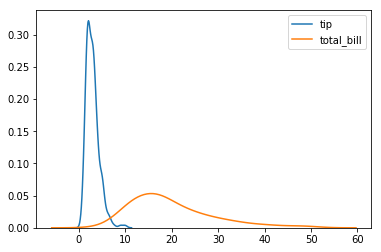

In [10]:
#Can do other plots like sns.rugplot(), sns.kdeplot().
#For same figure plot, do the plot twice in the same cell
sns.kdeplot(tips['tip'])
sns.kdeplot(tips['total_bill'])

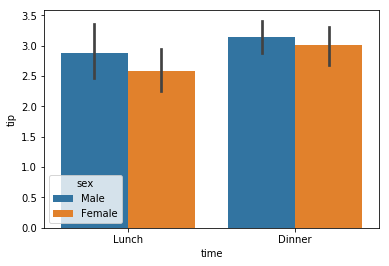

In [11]:
sns.barplot(x='time',y='tip', data=tips, hue='sex')

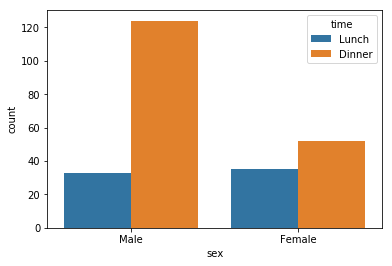

In [12]:
sns.countplot(x='sex', hue='time', data=tips)

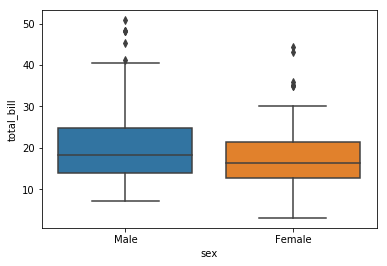

In [13]:
sns.boxplot(x='sex',y='total_bill', data=tips)

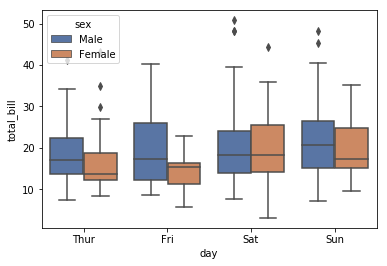

In [14]:
sns.boxplot(x='day',y='total_bill', data=tips, hue='sex', palette='deep')

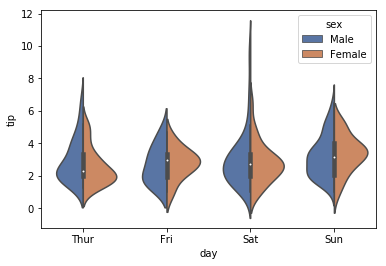

In [19]:
# Mainly only used by data scientists
sns.violinplot(x='day',y='tip', data=tips, hue='sex', palette='deep', split=True)

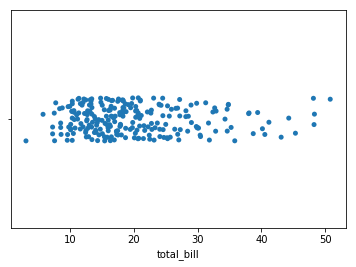

In [35]:
sns.stripplot(x='total_bill', data=tips)

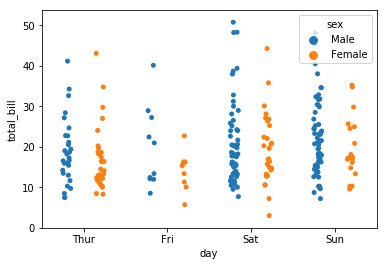

In [31]:
sns.stripplot(x='day',y='total_bill',data=tips, jitter=True, hue='sex', dodge=True)

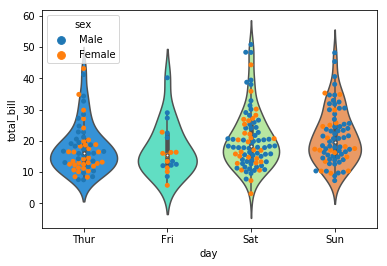

In [42]:
sns.swarmplot(x='day',y='total_bill', data=tips, hue='sex')
sns.violinplot(x='day',y='total_bill', data=tips, palette='rainbow')

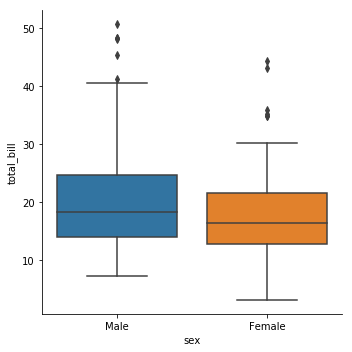

In [45]:
#sns.factorplot has been renamed to catplot
#Can be used to plot different kinds of plots by altering kind
sns.catplot(x='sex',y='total_bill',data=tips, kind='box')

In [46]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


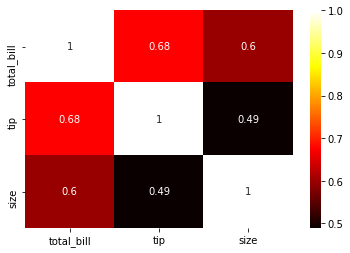

In [50]:
sns.heatmap(tips.corr(),cmap='hot',annot=True)

In [51]:
flights = sns.load_dataset('flights')

In [52]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [56]:
flights.pivot_table(values='passengers',index='year',columns='month')

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


In [57]:
new_flights = flights.pivot_table(values='passengers',index='year',columns='month')

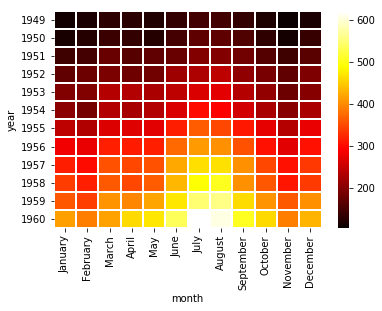

In [59]:
sns.heatmap(data=new_flights,linecolor='white',linewidth=1,cmap='hot')

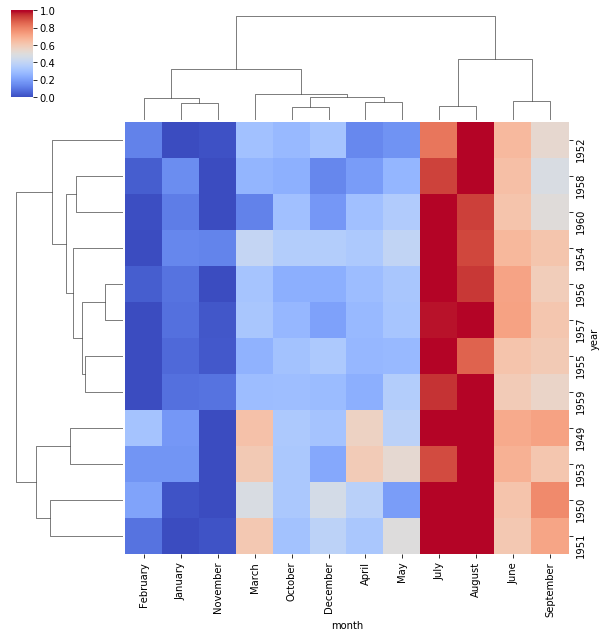

In [61]:
sns.clustermap(new_flights,cmap='coolwarm',standard_scale=2)

In [62]:
# Customize plots even more
import matplotlib.pyplot as plt

In [63]:
iris = sns.load_dataset('iris')

In [64]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [65]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

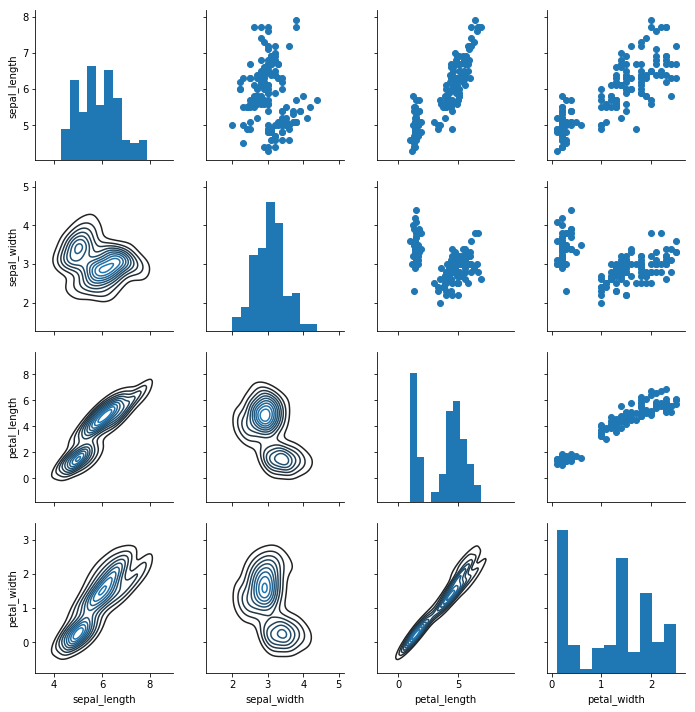

In [69]:
# Able to customize the full pair plot
i = sns.PairGrid(iris)
#i.map(plt.scatter)
i.map_diag(plt.hist)
i.map_lower(sns.kdeplot)
i.map_upper(plt.scatter)

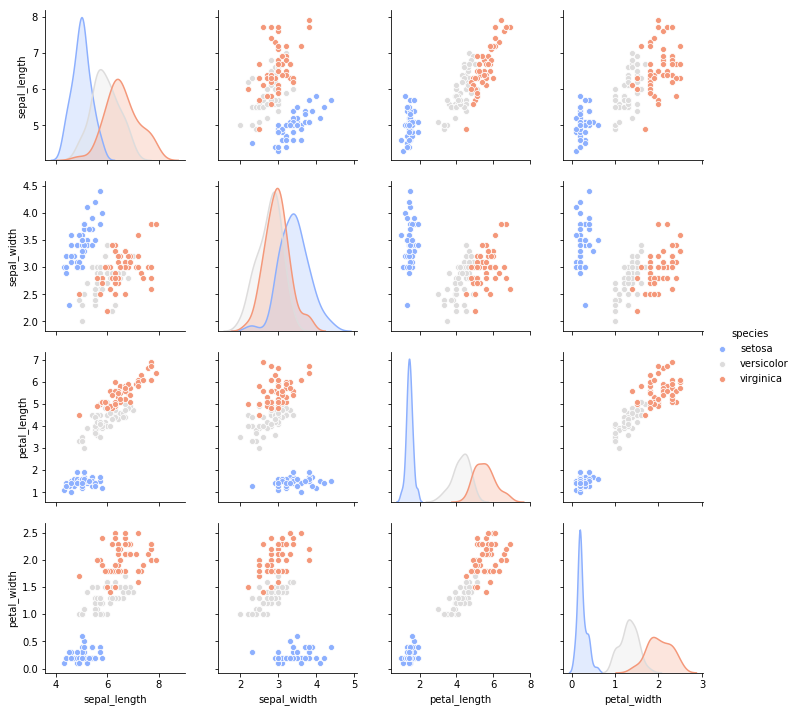

In [70]:
sns.pairplot(iris,palette='coolwarm',hue='species')

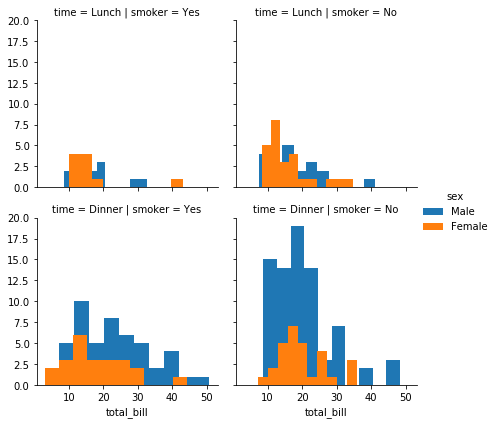

In [74]:
#Both functions work the same way
#sns.FacetGrid(tips, row='time', col='smoker').map(plt.hist, 'total_bill')
v = sns.FacetGrid(tips, row='time', col='smoker', hue='sex')
v.map(plt.hist, 'total_bill')
v.add_legend()

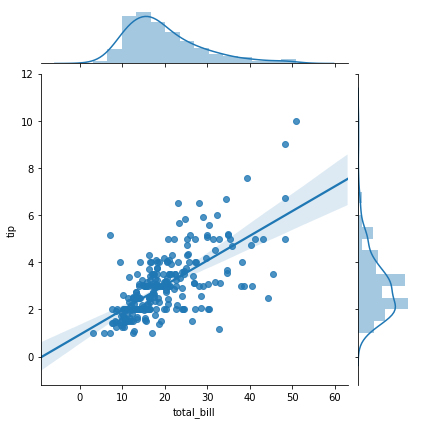

In [75]:
#Able to pass two different plots
sns.JointGrid(x='total_bill',y='tip',data=tips).plot(sns.regplot, sns.distplot)
#sns.JointGrid(x='total_bill',y='tip',data=tips).plot(sns.scatter, sns.kdeplot)

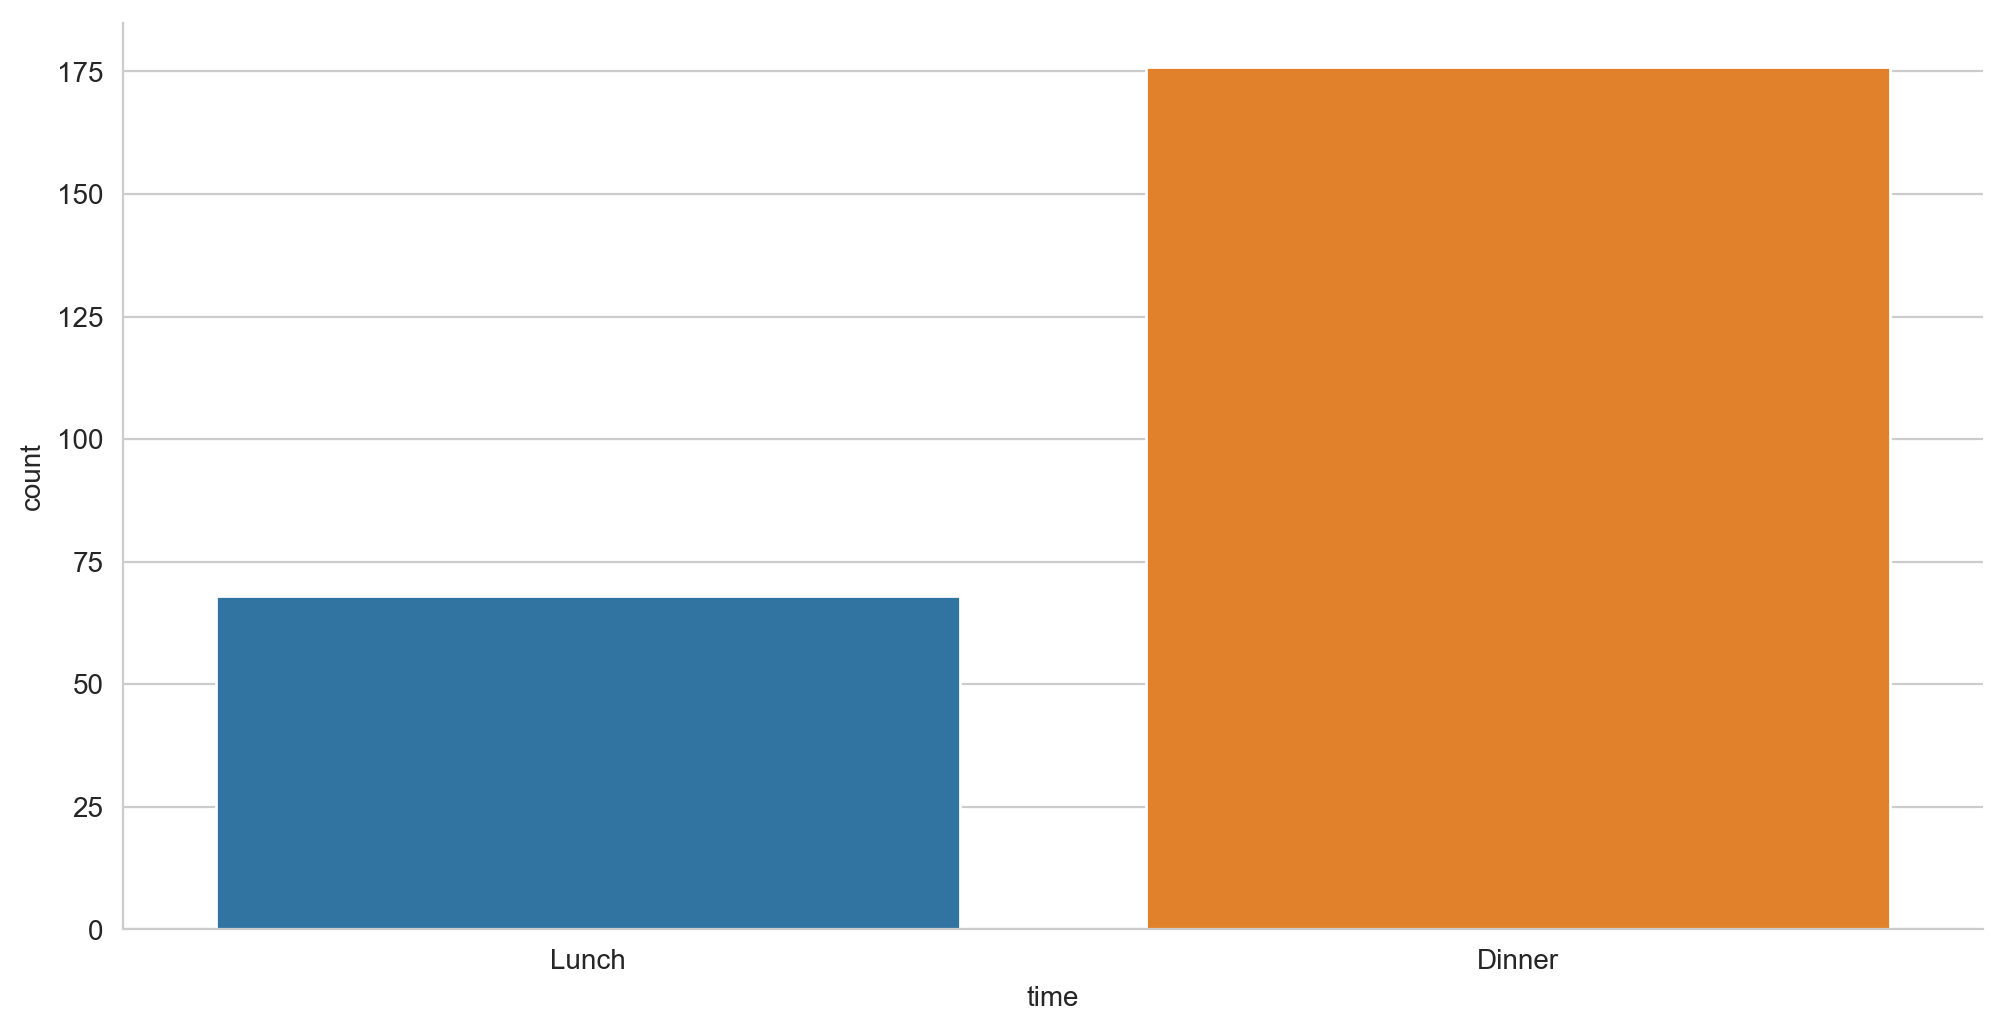

In [80]:
plt.figure(figsize=(12,6),dpi=200)
sns.set_style(style='whitegrid')
sns.countplot(x='time',data=tips)
sns.despine()

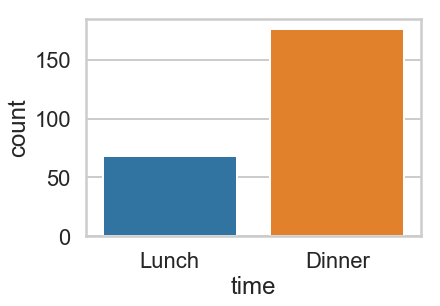

In [82]:
sns.set_context('poster', font_scale=1)
sns.countplot(x='time',data=tips)

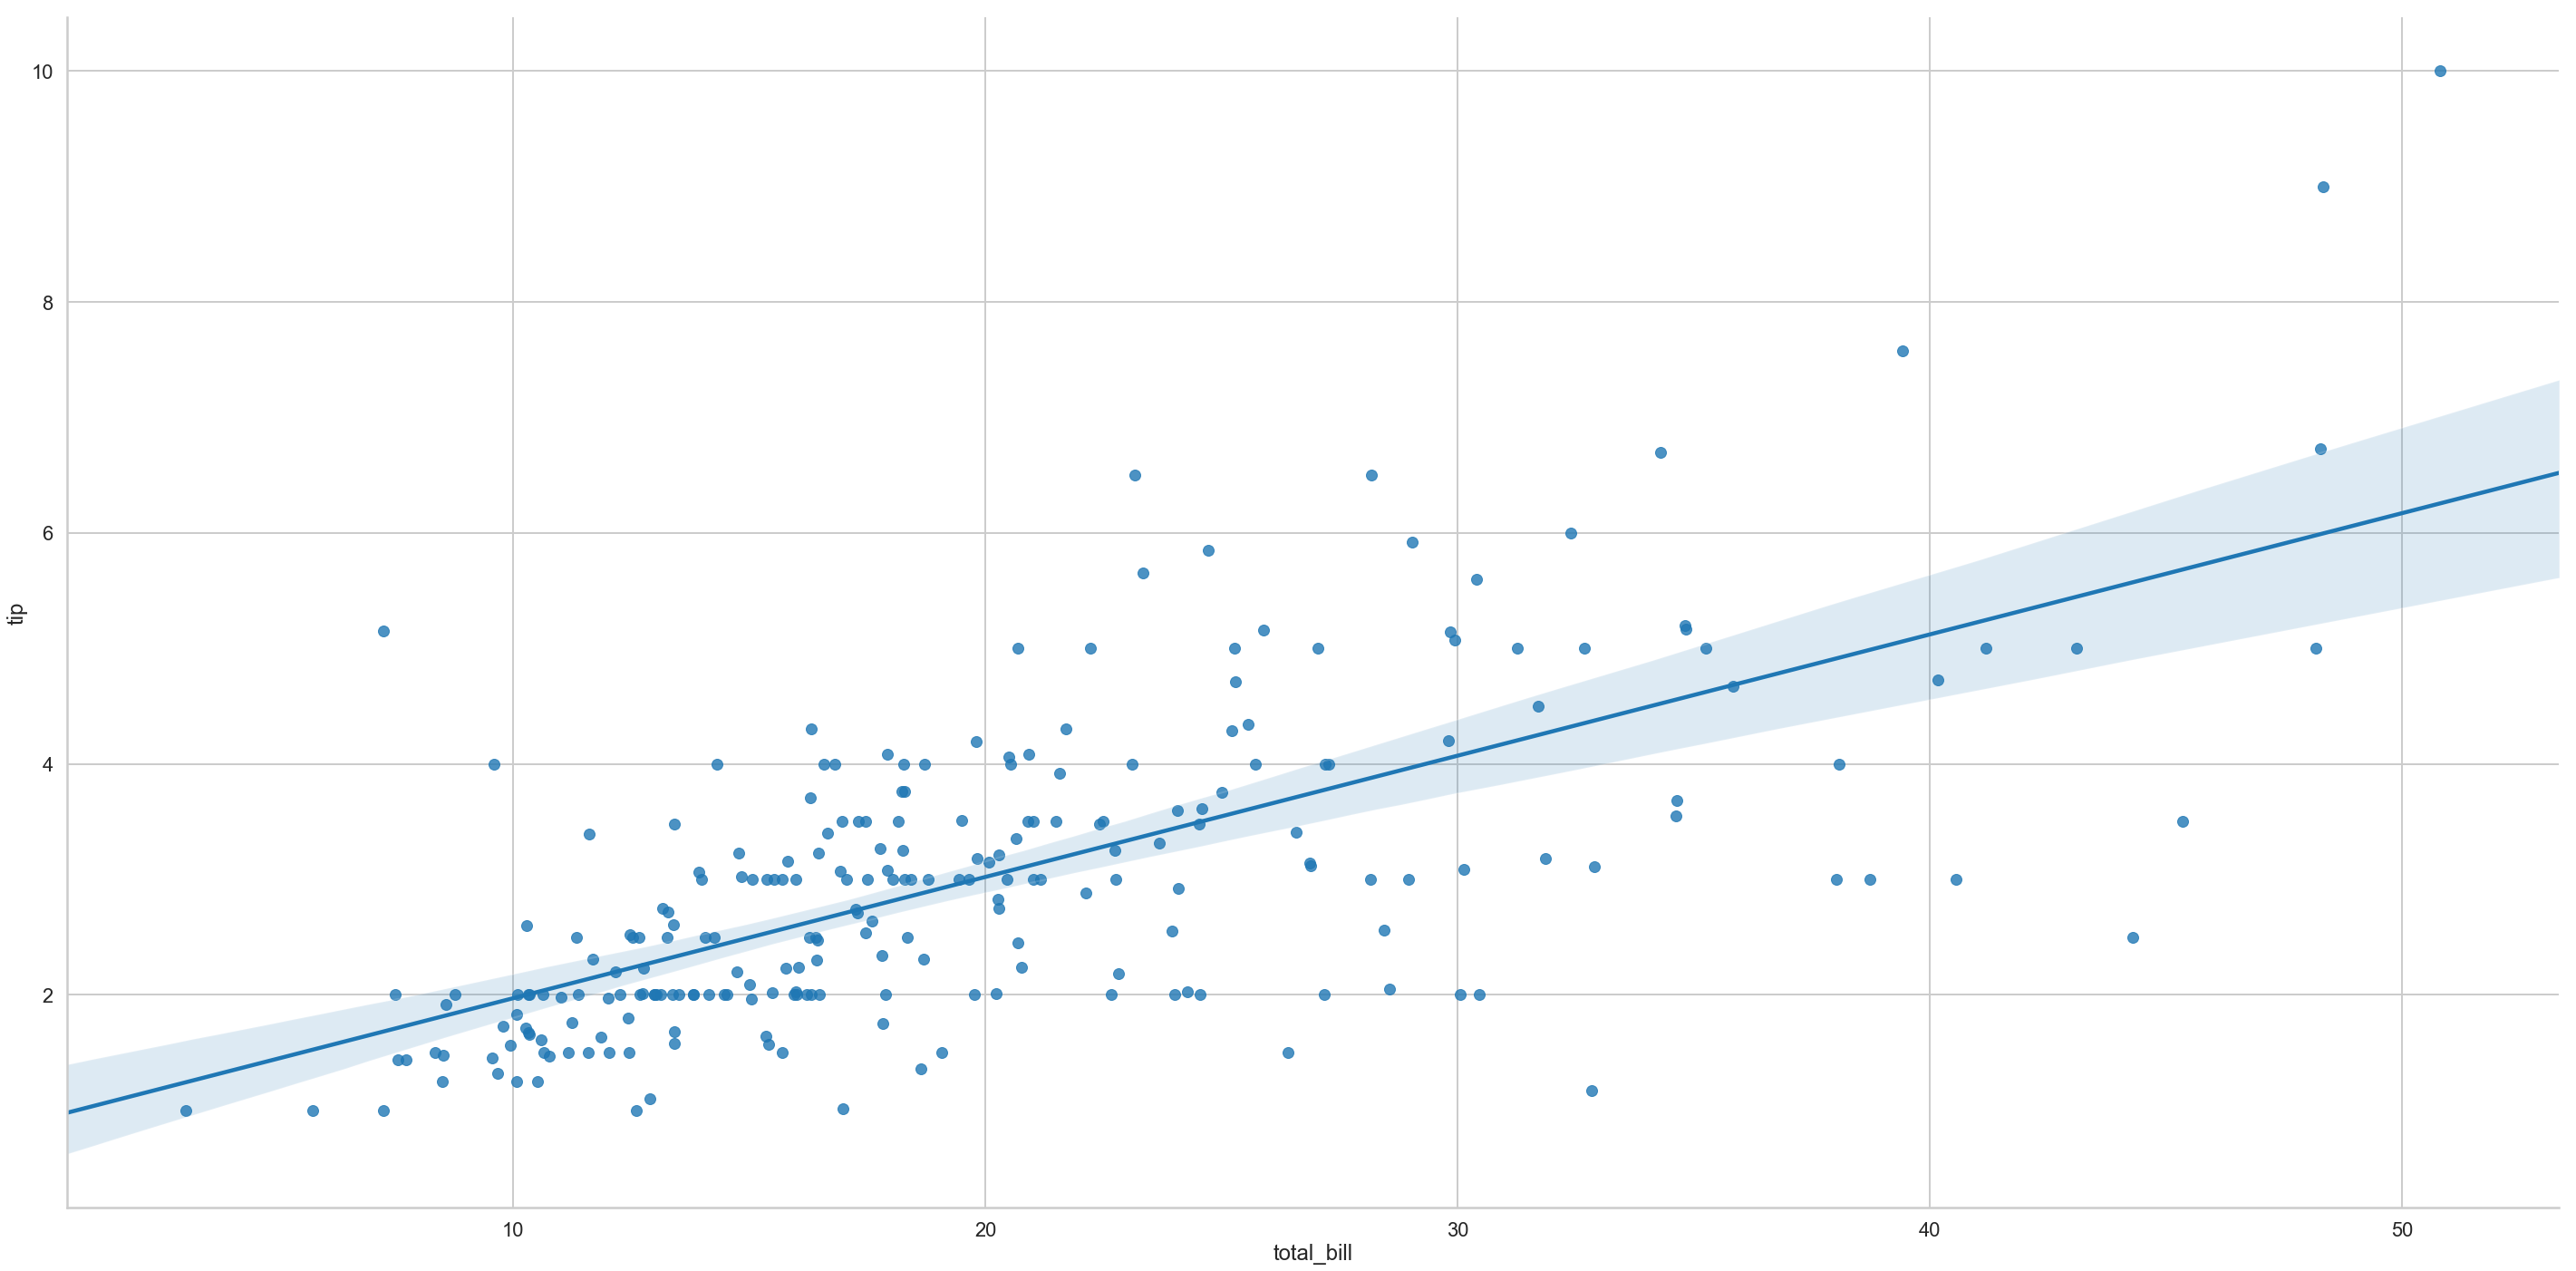

In [90]:
sns.lmplot(x='total_bill',y='tip',data=tips, height=20, aspect=2)